# Persona Part 3

## 5. Persona Image

In the following example, "Sara" is extended to incorporate the persona image.

INFO     Resized image from 512x512 to 256x256, original=439804 bytesize=119053
INFO     Resized image from 512x512 to 128x128, original=439804 bytesize=32886
INFO     Resized image from 512x512 to 64x64, original=439804 bytesize=9708


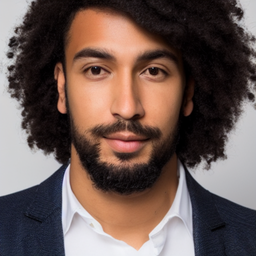

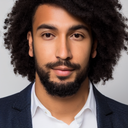

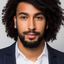

In [8]:
import os
os.environ["LOG_LEVEL"]="INFO"

# Provision a basic persona
from gai.persona.persona_builder import PersonaBuilder
from gai.persona.profile.pydantic.ProvisionAgentPydantic import ProvisionAgentPydantic
persona_builder = PersonaBuilder(
    provision=ProvisionAgentPydantic(        
        Name="Mikael",
        AgentTraits=["intelligent","cheerful","diligent"],
        AgentImageStyles=["8k","photorealistic","DSLR photo","uhd highly detailed","headshot portrait"],
       )
    )

# Build persona
from gai.tti.client.tti_client import TTIClient
persona_builder.create_image(tti_client=TTIClient(config={
    "type":"tti",
    "url":"http://192.168.1.200:12035/sdapi/v1/txt2img"
}))
persona=persona_builder.build()

from IPython.display import Image, display
from io import BytesIO
display(Image(data=BytesIO(persona.agent_image.Image256).getvalue(),format='png'))    
display(Image(data=BytesIO(persona.agent_image.Image128).getvalue(),format='png'))    
display(Image(data=BytesIO(persona.agent_image.Image64).getvalue(),format='png')) 

---

## 3. Import / Export

The process of persona provisioning may involve multiple steps, so we can export the intermediate results to a directory and continue later.

In [9]:
# Save provisioning details for intermediary use (if needed)
export_dir=os.path.abspath(os.path.join(os.path.dirname(__name__),"data","Mikael"))
await persona_builder.export_async(export_dir=export_dir)


INFO     persona_builder: Exporting to /home/kakkoii1337/github/kakkoii1337/gai-core/gai-sdk/gai-persona/tests/integration_test/4_persona/data/Mikael


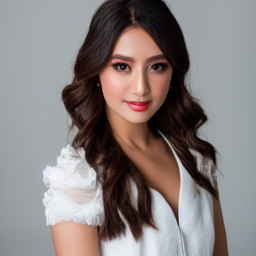

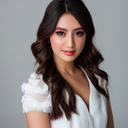

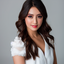

In [3]:
# Load provisioning details and build persona
import os
from gai.persona.persona_builder import PersonaBuilder
from gai.persona.profile.pydantic.ProvisionAgentPydantic import ProvisionAgentPydantic
persona_builder = PersonaBuilder(
    provision=ProvisionAgentPydantic(        
        Name="Sara",
       )
    )
import_dir=os.path.abspath(os.path.join(os.path.dirname(__name__),"data","Sara"))
await persona_builder.import_async(import_dir=import_dir)

# Build
persona=persona_builder.build()
from IPython.display import Image, display
from io import BytesIO
display(Image(data=BytesIO(persona.agent_image.Image256).getvalue(),format='png'))    
display(Image(data=BytesIO(persona.agent_image.Image128).getvalue(),format='png'))    
display(Image(data=BytesIO(persona.agent_image.Image64).getvalue(),format='png')) 